The value of the force W that acts on gear B is 0.359 kN
{R_Oy: -398.599395236888, R_Cy: -128.079703536598, R_Oz: 302.205882352941, R_Cz: 410.294117647059}
The value of the reaction force that acts on bearing O is 0.500 kN
The value of the reaction force that acts on bearing C is 0.430 kN
The maximum bending moment acts on A is 97.826 MPa
The torsional shear stress acts on A is -11.001 MPa
The principal stress 1 is 99.048 MPa
The principal stress 2 is -1.222 MPa
The maximum shear stress is 50.135 MPa


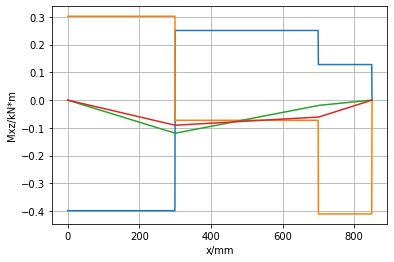

In [50]:
# Yuming Gu 4456484 Mechanical Design II homework 1.2
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
import math

T_1=150;
T_2=600;
d_A=0.15;
d_B=0.2;
d_C=0.025;

theta_A=60.*(np.pi/180.);
theta_B=20.*(np.pi/180.);

dist_OA=0.3;
dist_OB=0.7;
dist_OC=0.85;

#(a)Determine the value of the force W that acts on gear B.
W=((T_2-T_1)*d_A)/(d_B*np.cos(theta_B));
print('The value of the force W that acts on gear B is {:.3f} kN'.format(W*1e-3))

#(b)Find the magnitudes of the bearing reaction forces.

sym.init_printing()
R_Oy, R_Oz, R_Cy, R_Cz = sym.symbols('R_Oy,R_Oz, R_Cy, R_Cz')
eq1=sym.Eq(R_Oy+(T_1+T_2)*np.sin(theta_A)-W*np.sin(theta_B)+R_Cy,0);
eq2=sym.Eq(R_Oz-(T_1+T_2)*np.cos(theta_A)-W*np.cos(theta_B)+R_Cz,0);
eq3=sym.Eq((T_1+T_2)*np.sin(theta_A)*dist_OA-W*np.sin(theta_B)*dist_OB+R_Cy*dist_OC,0);
eq4=sym.Eq((T_1+T_2)*np.cos(theta_A)*dist_OA+W*np.cos(theta_B)*dist_OB-R_Cz*dist_OC,0);
sol=sym.solve([eq1,eq2,eq3,eq4],(R_Oy,R_Oz,R_Cy,R_Cz));

print(sol)
R_Oy=sol[R_Oy];
R_Oz=sol[R_Oz];
R_Cy=sol[R_Cy];
R_Cz=sol[R_Cz];

R_O=math.sqrt(R_Oy**2+R_Oz**2);
R_C=math.sqrt(R_Cy**2+R_Cz**2);
print('The value of the reaction force that acts on bearing O is {:.3f} kN'.format(R_O*1e-3))
print('The value of the reaction force that acts on bearing C is {:.3f} kN'.format(R_C*1e-3))

#(c)Draw the shear force and bending moment diagrams for both the horizontal and vertical planes

#xy plane, shear force
x=np.linspace(0,dist_OC,1000)
V_xy=np.zeros_like(x)
for idx,loc in enumerate(x):
    if loc<dist_OA:
        V_xy[idx]=R_Oy;
    elif((loc>=dist_OA) and (loc<dist_OB)):
        V_xy[idx]=R_Oy+(T_1+T_2)*np.sin(theta_A);
    elif((loc>=dist_OB) and (loc<dist_OC)):
        V_xy[idx]=R_Oy+(T_1+T_2)*np.sin(theta_A)-W*np.sin(theta_B);
    else:
        V_xy[idx]=R_Oy+(T_1+T_2)*np.sin(theta_A)-W*np.sin(theta_B)+R_Cy;

plt.plot(1e3*x,1e-3*V_xy);
plt.grid(True);
plt.xlabel('x/mm');
plt.ylabel('Vxy/kN');

#xz plane, shear force
x=np.linspace(0,dist_OC,1000)
V_xz=np.zeros_like(x)
for idx,loc in enumerate(x):
    if loc<dist_OA:
        V_xz[idx]=R_Oz;
    elif((loc>=dist_OA) and (loc<dist_OB)):
        V_xz[idx]=R_Oz-(T_1+T_2)*np.cos(theta_A);
    elif((loc>=dist_OB) and (loc<dist_OC)):
        V_xz[idx]=R_Oz-(T_1+T_2)*np.cos(theta_A)-W*np.cos(theta_B);
    else:
        V_xz[idx]=R_Oz-(T_1+T_2)*np.cos(theta_A)-W*np.cos(theta_B)+R_Cz;

plt.plot(1e3*x,1e-3*V_xz);
plt.grid(True);
plt.xlabel('x/mm');
plt.ylabel('Vxz/kN');

#xy plane, bending moment
x=np.linspace(0,dist_OC,1000)
M_xy=np.zeros_like(x)
for idx,loc in enumerate(x):
    if loc<dist_OA:
        M_xy[idx]=R_Oy*loc;
    elif((loc>=dist_OA) and (loc<dist_OB)):
        M_xy[idx]=R_Oy*loc+(T_1+T_2)*np.sin(theta_A)*(loc-dist_OA);
    elif((loc>=dist_OB) and (loc<dist_OC)):
        M_xy[idx]=R_Oy*loc+(T_1+T_2)*np.sin(theta_A)*(loc-dist_OA)-W*np.sin(theta_B)*(loc-dist_OB);
    else:
        M_xy[idx]=R_Oy*loc+(T_1+T_2)*np.sin(theta_A)*(loc-dist_OA)-W*np.sin(theta_B)*(loc-dist_OB)-R_Cy*(loc-dist_OC);
plt.plot(1e3*x,1e-3*M_xy)
plt.grid(True)
plt.xlabel('x/mm')
plt.ylabel('Mxy/kN');

#xz plane, bending moment
x=np.linspace(0,dist_OC,1000)
M_xz=np.zeros_like(x)
for idx,loc in enumerate(x):
    if loc<dist_OA:
        M_xz[idx]=-R_Oz*loc;
    elif((loc>=dist_OA) and (loc<dist_OB)):
        M_xz[idx]=-R_Oz*loc+(T_1+T_2)*np.cos(theta_A)*(loc-dist_OA);
    elif((loc>=dist_OB) and (loc<dist_OC)):
        M_xz[idx]=-R_Oz*loc+(T_1+T_2)*np.cos(theta_A)*(loc-dist_OA)+W*np.cos(theta_B)*(loc-dist_OB);
    else:
        M_xz[idx]=-R_Oz*loc+(T_1+T_2)*np.cos(theta_A)*(loc-dist_OA)+W*np.cos(theta_B)*(loc-dist_OB)-R_Cz*(loc-dist_OC);
plt.plot(1e3*x,1e-3*M_xz)
plt.grid(True)
plt.xlabel('x/mm')
plt.ylabel('Mxz/kN*m');

#(d)At the point of maximum bending moment, determine the bending stress and the torsional shear stress
#Moment at A
M_Ay=R_Oy*dist_OA;
M_Az=-R_Oz*dist_OA;
M_A=math.sqrt(M_Ay**2+M_Az**2)

M_By=R_Oy*dist_OB+(T_1+T_2)*np.sin(theta_A)*(dist_OB-dist_OA);
M_Bz=-R_Oz*dist_OB+(T_1+T_2)*np.cos(theta_A)*(dist_OB-dist_OA);
M_B=math.sqrt(M_By**2+M_Bz**2)

M=max(M_A,M_B)

T=(T_1-T_2)*d_A/2;

#maximum bending moment
Max_bend=(32*M)/(math.pi*(d_C**3));

#torsional shear stress
Tor_shear=(16*T)/(math.pi*(d_C**3));
print('The maximum bending moment acts on A is {:.3f} MPa'.format(Max_bend*1e-6))
print('The torsional shear stress acts on A is {:.3f} MPa'.format(Tor_shear*1e-6))

#(e)At the point of maximum bending moment, determine the principal stresses and the maximum shear stress.

#Principal Stress
P_stress1=Max_bend/2+math.sqrt((Max_bend/2)**2+Tor_shear**2);
P_stress2=Max_bend/2-math.sqrt((Max_bend/2)**2+Tor_shear**2);

#Maximum Shear Stress
Max_shear=(P_stress1-P_stress2)/2;
print('The principal stress 1 is {:.3f} MPa'.format(P_stress1*1e-6))
print('The principal stress 2 is {:.3f} MPa'.format(P_stress2*1e-6))
print('The maximum shear stress is {:.3f} MPa'.format(Max_shear*1e-6))

 










           
           





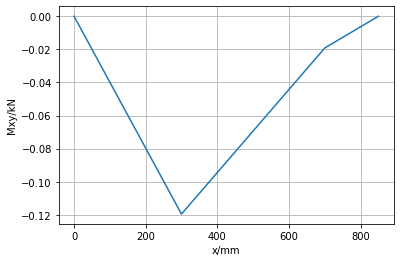

In [28]:
#xy plane, bending moment
x=np.linspace(0,dist_OC,1000)
M_xy=np.zeros_like(x)
for idx,loc in enumerate(x):
    if loc<dist_OA:
        M_xy[idx]=R_Oy*loc;
    elif((loc>=dist_OA) and (loc<dist_OB)):
        M_xy[idx]=R_Oy*loc+(T_1+T_2)*np.sin(theta_A)*(loc-dist_OA);
    elif((loc>=dist_OB) and (loc<dist_OC)):
        M_xy[idx]=R_Oy*loc+(T_1+T_2)*np.sin(theta_A)*(loc-dist_OA)-W*np.sin(theta_B)*(loc-dist_OB);
    else:
        M_xy[idx]=R_Oy*loc+(T_1+T_2)*np.sin(theta_A)*(loc-dist_OA)-W*np.sin(theta_B)*(loc-dist_OB)-R_Cy*(loc-dist_OC);
plt.plot(1e3*x,1e-3*M_xy)
plt.grid(True)
plt.xlabel('x/mm')
plt.ylabel('Mxy/kN');

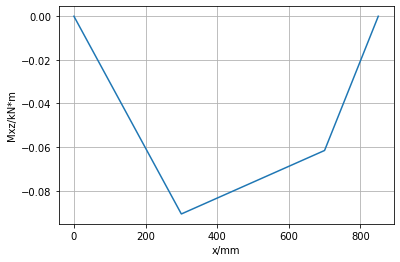

In [33]:
#xz plane, bending moment
x=np.linspace(0,dist_OC,1000)
M_xz=np.zeros_like(x)
for idx,loc in enumerate(x):
    if loc<dist_OA:
        M_xz[idx]=-R_Oz*loc;
    elif((loc>=dist_OA) and (loc<dist_OB)):
        M_xz[idx]=-R_Oz*loc+(T_1+T_2)*np.cos(theta_A)*(loc-dist_OA);
    elif((loc>=dist_OB) and (loc<dist_OC)):
        M_xz[idx]=-R_Oz*loc+(T_1+T_2)*np.cos(theta_A)*(loc-dist_OA)+W*np.cos(theta_B)*(loc-dist_OB);
    else:
        M_xz[idx]=-R_Oz*loc+(T_1+T_2)*np.cos(theta_A)*(loc-dist_OA)+W*np.cos(theta_B)*(loc-dist_OB)-R_Cz*(loc-dist_OC);
plt.plot(1e3*x,1e-3*M_xz)
plt.grid(True)
plt.xlabel('x/mm')
plt.ylabel('Mxz/kN*m');

In [55]:
#(d)At the point of maximum bending moment, determine the bending stress and the torsional shear stress
#Moment at A
M_Ay=R_Oy*dist_OA;
M_Az=-R_Oz*dist_OA;
M_A=math.sqrt(M_Ay**2+M_Az**2)

M_By=R_Oy*dist_OB+(T_1+T_2)*np.sin(theta_A)*(dist_OB-dist_OA);
M_Bz=-R_Oz*dist_OB+(T_1+T_2)*np.cos(theta_A)*(dist_OB-dist_OA);
M_B=math.sqrt(M_By**2+M_Bz**2)

M=max(M_A,M_B)

T=(T_1-T_2)*d_A/2;

#maximum bending moment
Max_bend=(32*M)/(math.pi*(d_C**3));

#torsional shear stress
Tor_shear=(16*T)/(math.pi*(d_C**3));
print('The maximum bending moment acts on A is {:.3f} MPa'.format(Max_bend*1e-6))
print('The torsional shear stress acts on A is {:.3f} MPa'.format(Tor_shear*1e-6))

The maximum bending moment acts on A is 97.826 MPa
The torsional shear stress acts on A is -11.001 MPa


In [56]:
#(e)At the point of maximum bending moment, determine the principal stresses and the maximum shear stress.

#Principal Stress
P_stress1=Max_bend/2+math.sqrt((Max_bend/2)**2+Tor_shear**2);
P_stress2=Max_bend/2-math.sqrt((Max_bend/2)**2+Tor_shear**2);

#Maximum Shear Stress
Max_shear=(P_stress1-P_stress2)/2;
print('The principal stress 1 is {:.3f} MPa'.format(P_stress1*1e-6))
print('The principal stress 2 is {:.3f} MPa'.format(P_stress2*1e-6))
print('The maximum shear stress is {:.3f} MPa'.format(Max_shear*1e-6))

The principal stress 1 is 99.048 MPa
The principal stress 2 is -1.222 MPa
The maximum shear stress is 50.135 MPa
